In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
// from https://stackoverflow.com/questions/36757301/disable-ipython-notebook-autoscrolling
// disable scroll

<IPython.core.display.Javascript object>

In [2]:
"""
imaginary numbers are builtin in python and indicated by 'j'
"""
from matplotlib import pyplot as plt
import random

#in: amount of sample sizes, start = smallest sample size, 
    #ratio = factor by which each next sample size is larger than the previous
#out: list of sample sizes
def generate_sample_sizes(amount, start, ratio):
    sample_sizes = [start]
    number = start
    for step in range(amount - 1): 
        sample_sizes.append(number * ratio)
        number = number * ratio
    return sample_sizes

#out: imaginary number with sum(abs(real) + abs(imaginary)) < 2
#random selection of complex numbers in circle with radius = 2
def generate_complex_number():
    real = 2 * (-1 + 2*random.random())
    imaginary = 2j * (-1 + 2*random.random())
    imaginary_number = real + imaginary
    return imaginary_number

#in: the amount of iterations to be done before the number is considered a mandelbrot number
    # a generated imaginary number
#out: the imaginary number, the amount of iterations until the real part of number > 2, 
    #'T' if number is mandelbrot, else 'F'
def determine_if_mandelbrot(iterations, imaginary_number):
    z = imaginary_number
    iteration = 0
    while abs(z.real) < 2 and abs(z.imag) < 2 and iteration < iterations:
        z = z**2 + imaginary_number
        iteration += 1
    if iteration == iterations:
        boolean = 'T'
    else:
        boolean = 'F'
    return [imaginary_number, iteration, boolean] 

def plot(mandelbrot_set):
    dkjbckjbc

#in: sample size aka amount of random numbers to test for mandelbrot, 
    #the amount of iterations to be done before the number is considered a mandelbrot number    
#out: list of imaginary numbers, amount of iterations & boolean to show whether in mandelbrot set
def do_multiple_samples(sample_size, iterations):
    mandelbrot_set = []
    for sample in range(sample_size):
        imaginary_number = generate_complex_number()
        potential_mandelbrot = determine_if_mandelbrot(iterations, imaginary_number)
        mandelbrot_set.append(potential_mandelbrot)
    return mandelbrot_set

#in: the sample sizes to be tested
# out: list of complex numbers per sample size
def run_multiple_sample_sizes(sample_sizes):
    multiple_mandelbrot_sets = []
    for sample_size in sample_sizes:
        iterations = sample_size / 10
        if iterations < 10:
            print 'ERROR: sample size < 100'
        mandelbrot_set = do_multiple_samples(sample_size, iterations)
        multiple_mandelbrot_sets.append(mandelbrot_set)
    return multiple_mandelbrot_sets

#in: matrix from run_multiple_sample_sizes
#out: the ratio of numbers in the mandelbrot set and outside the mandelbrot set and the amount of samples taken
def determine_ratio_in_out(multiple_mandelbrot_sets):
    ratios_sample_size = []
    for mandelbrot_set in multiple_mandelbrot_sets:
        iterations = len(mandelbrot_set) / 10
        mandelbrot_numbers = 0
        for imaginary_number in mandelbrot_set:
            if imaginary_number[2] == "T":
                mandelbrot_numbers += 1
        ratio_in_out = float(mandelbrot_numbers) / len(mandelbrot_set)
        ratios_sample_size.append([ratio_in_out, len(mandelbrot_set)])    
    return ratios_sample_size

def main(sample_sizes):
    multiple_mandelbrot_sets = run_multiple_sample_sizes(sample_sizes)
    ratios_sample_size = determine_ratio_in_out(multiple_mandelbrot_sets)
    return ratios_sample_size

In [113]:
sample_sizes = generate_sample_sizes(1, 100, 2)
print main(sample_sizes)

[[0.24, 100]]


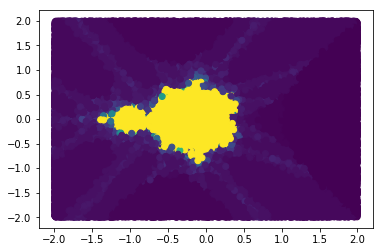

In [13]:
results = do_multiple_samples(100000, 100)
x = []
y = []
color = []
for result in results:
    x.append(result[0].real)
    y.append(result[0].imag)
    color.append(result[1])
plt.scatter(x,y, c=color)
plt.show()

2.7885


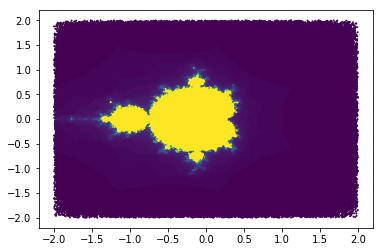

In [1]:
# latin hypercube sampling
% matplotlib inline

import random
from matplotlib import pyplot as plt
import numpy as np

def determine_if_mandelbrot(iterations, imaginary_number):
    z = imaginary_number
    iteration = 0
    while abs(z.real) < 2 and abs(z.imag) < 2 and iteration < iterations:
        z = z**2 + imaginary_number
        iteration += 1
    if iteration == iterations:
        boolean = 'T'
    else:
        boolean = 'F'
    return [imaginary_number, iteration, boolean] 

realRange = [-2, 2]
imagRange = [-2, 2]
n = 800000
iterations = 1000

realGrid = np.arange(realRange[0], realRange[1], (realRange[1]-realRange[0])*1.0/n)
if len(realGrid) == n:
	realGrid = np.append(realGrid, realRange[1])
imagGrid = np.arange(imagRange[0], imagRange[1], (imagRange[1]-imagRange[0])*1.0/n)
if len(imagGrid) == n:
	imagGrid = np.append(imagGrid, imagRange[1])

realOrder = random.sample(np.arange(n), n)
imagOrder = random.sample(np.arange(n), n)


all_points = []
for i in range(n):

	point = random.uniform(realGrid[realOrder[i]], realGrid[realOrder[i] + 1]) + 1j* random.uniform(imagGrid[imagOrder[i]], imagGrid[imagOrder[i]+1])
	all_points.append(determine_if_mandelbrot(iterations, point))



hit = 0
x = []
y = []
color = []

for result in all_points:
	if result[2] == 'T':
		hit += 1
	x.append(result[0].real)
	y.append(result[0].imag)
	color.append(result[1])
	
plt.scatter(x,y, s=1, c=color)
plt.ylim(-2,2)
plt.xlim(-2,2)
print(hit*1.0/n * 16.0)
plt.show()

realGrid = [-2. -1.  0.  1.]
imagGrid = [-2. -1.  0.  1.]
realOrder = [1, 2, 0, 3]
imagOrder = [3, 0, 1, 2]
all_points = [[(-0.5+1j), 3, 'F'], [(1.5-2j), 0, 'F'], [(-1.5-1j), 1, 'F'], [(1.5+0j), 1, 'F']]


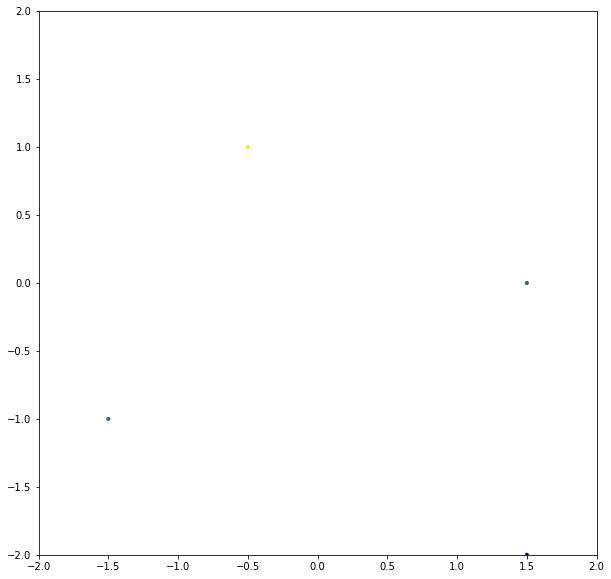

In [23]:
"""
orthogonal sampling
"""
% matplotlib inline

import random
from matplotlib import pyplot as plt
import numpy as np

def determine_if_mandelbrot(iterations, imaginary_number):
    z = imaginary_number
    iteration = 0
    while abs(z.real) < 2 and abs(z.imag) < 2 and iteration < iterations:
        z = z**2 + imaginary_number
        iteration += 1
    if iteration == iterations:
        boolean = 'T'
    else:
        boolean = 'F'
    return [imaginary_number, iteration, boolean] 

realRange = [-2, 2]
imagRange = [-2, 2]
n = 4
iterations = 100

realGrid = np.arange(realRange[0], realRange[1], (realRange[1]-realRange[0])*1.0/n)
imagGrid = np.arange(imagRange[0], imagRange[1], (imagRange[1]-imagRange[0])*1.0/n)
print 'realGrid =', realGrid
print 'imagGrid =', imagGrid

realOrder = random.sample(np.arange(n), n)
imagOrder = random.sample(np.arange(n), n)
print 'realOrder =', realOrder
print 'imagOrder =', imagOrder

# generate a list of n real numbers evenly distributed between the difference between neighbouring realGrid numbers
realGridDistance = (realRange[1]-realRange[0])*1.0/n
realCubeGrid = np.arange(0, realGridDistance, (realGridDistance)*1.0/n)

# generate a list of n imaginary numbers evenly distributed between the difference between neighbouring realGrid numbers
imagGridDistance = (imagRange[1]-imagRange[0])*1.0/n
imagCubeGrid = np.arange(0, imagGridDistance, (imagGridDistance)*1.0/n)

realCubeOrder = random.sample(np.arange(n), n)
imagCubeOrder = random.sample(np.arange(n), n)



all_points = []
for i in range(n):
    point = realGrid[realOrder[i]] + realCubeGrid[realCubeOrder[i]] + 1j * imagGrid[imagOrder[i]] + imagCubeGrid[imagCubeOrder[i]]
    all_points.append(determine_if_mandelbrot(iterations, point))

print 'all_points =', all_points
    
hit = 0
x = []
y = []
color = []

for result in all_points:
	if result[2] == 'T':
		hit += 1
	x.append(result[0].real)
	y.append(result[0].imag)
	color.append(result[1])
	
plt.figure(figsize=(10,10))
plt.scatter(x,y, s=10, c=color)
plt.ylim(-2,2)
plt.xlim(-2,2)
plt.show()

In [ ]:
# generate a list of n numbers evenly distributed between the difference between neighbouring realGrid numbers
realGridDistance = (realRange[1]-realRange[0])*1.0/n
#print realGridDistance
realCubeGrid = np.arange(0, realGridDistance, (realGridDistance)*1.0/n)
print realCubeGrid

#np.arange(realRange[0], realRange[1], (realRange[1]-realRange[0])*1.0/n)